In [118]:
# installing packages
!pip install scikit-learn
!pip install statsmodels
!pip install econml
!pip install dowhy

In [119]:
!pip install -U DoubleML

In [120]:
import numpy as np
import pandas as pd

In [121]:
# Load the datasets
complaints_allegation = pd.read_csv('complaints-allegation.csv')
officers = pd.read_csv('final-profiles.csv')
salary = pd.read_csv('salary_2002-2017_2017-09.csv')
salary_ranks = pd.read_csv('salary-ranks_2002-2017_2017-09.csv')
complaints = pd.read_csv('complaints-complaints.csv')

complaints_allegation = pd.merge(complaints_allegation, complaints, on = 'cr_id', how='left')
merged_data_1 = pd.merge(salary_ranks, complaints_allegation, left_on='link_UID', right_on='link_UID', how='left')
merged_data = pd.merge(merged_data_1, officers, left_on='link_UID', right_on='link_UID', how='left')

# mapping for allegation category to violent/nonviolent
category_mapping = {
    'MISCELLANEOUS': 'Non-Violent',
    'DOMESTIC ALTERCATION - PHYSICAL ABUSE': 'Violent',
    'NEGLECT OF DUTY': 'Non-Violent',
    'EXCESSIVE FORCE - USE OF FIREARM / OFF DUTY - INJURY': 'Violent',
    'UNNECESSARY DISPLAY OF WEAPON / ON DUTY': 'Non-Violent',
    'USE OF PROFANITY': 'Non-Violent',
    'EXCESSIVE FORCE / OFF DUTY - NO INJURY': 'Violent',
    'EXCESSIVE FORCE / On DUTY - INJURY': 'Violent',
    'CONDUCT UNBECOMING': 'Non-Violent',
    'NO INJURY': "Non-Violent",
    'PUSH/PULL/GRAB': "Violent",
    'INJURY': "Violent",
    'FALSE': "Non-Violent",
    'FAIL TO SUBMIT': "Non-Violent",
    'INADEQUATE / FAILURE TO PROVIDE SERVICE': "Non-Violent",
    'HARASSMENT': "Non-Violent",
    'EXCESSIVE FORCE - USE OF FIREARM / OFF DUTY - NO INJURY': "Violent",
    'VERBAL ABUSE': "Non-Violent",
    'FAIL TO OBTAIN A COMPLAINT REGISTER NUMBER': "Non-Violent",
    'LEAVING ASSIGNMENT (DISTRICT, BEAT, SECTOR, COURT)': "Non-Violent",
    'INTOXICATED OFF DUTY': "Non-Violent",
    'CLOSED HAND STRIKE (PUNCH)': "Violent",
}

merged_data.loc[:, 'violence_classification'] = merged_data['allegation_category'].map(category_mapping).fillna('Non-Violent')

<ipython-input-121-f569dcec58fe>:2: DtypeWarning: Columns (16,18,22) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints_allegation = pd.read_csv('complaints-allegation.csv')
<ipython-input-121-f569dcec58fe>:3: DtypeWarning: Columns (4,15) have mixed types. Specify dtype option on import or set low_memory=False.
  officers = pd.read_csv('final-profiles.csv')
<ipython-input-121-f569dcec58fe>:6: DtypeWarning: Columns (0,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv('complaints-complaints.csv')


In [122]:
complaints_allegation.head()

,row_id,complaints-accused_2000-2018_2018-03_ID,cr_id,accusation_id,allegation_category,allegation_category_code,current_investigator_category,current_investigator_category_code,unit,unit_detail,...,cv,incident_date,complaint_date,closed_date,add1,add2,beat,city,full_address,location
0,1,1,259794,262460,EXCESSIVE FORCE / ON DUTY - INJURY,05A,ARRESTEE-DURING ARREST,05ZZA,NaN,3.0,...,2.0,2000-02-03,2000-02-03,2001-01-19,6000,S RHODES,313.0,CHICAGO IL,NaN,17
1,2,2,259794,262461,EXCESSIVE FORCE / ON DUTY - INJURY,05A,ARRESTEE-DURING ARREST,05ZZA,NaN,3.0,...,2.0,2000-02-03,2000-02-03,2001-01-19,6000,S RHODES,313.0,CHICAGO IL,NaN,17
2,3,3,259797,262464,UNNECESSARY PHYSICAL CONTACT -ON DUTY,05ZZL,UNNECESSARY PHYSICAL CONTACT -ON DUTY,05ZZL,NaN,NaN,...,2.0,2000-02-03,2000-02-03,2000-04-24,4318,W HIRSCH,2534.0,CHICAGO IL,NaN,17
3,4,4,259804,262476,EXCESSIVE FORCE - USE OF FIREARM / OFF DUTY - ...,05G,UNNECESSARY DISPLAY OF WEAPON / OFF DUTY,05Q,NaN,153.0,...,2.0,2000-02-02,2000-02-04,2004-04-16,2600,W 69TH ST,0.0,CHICAGO IL,NaN,17
4,5,4,259804,262476,EXCESSIVE FORCE - USE OF FIREARM / OFF DUTY - ...,05G,UNNECESSARY DISPLAY OF WEAPON / OFF DUTY,05Q,NaN,153.0,...,2.0,2000-02-02,2000-02-04,2004-04-16,2600,W 69TH ST,0.0,CHICAGO IL,NaN,17


In [123]:
salary_ranks.columns

Index(['UID', 'pay_grade', 'rank', 'salary', 'year', 'spp_date',
       'cleaned_rank', 'link_UID'],
      dtype='object')

In [124]:
complaints_allegation.columns

Index(['row_id', 'complaints-accused_2000-2018_2018-03_ID', 'cr_id',
       'accusation_id', 'allegation_category', 'allegation_category_code',
       'current_investigator_category', 'current_investigator_category_code',
       'unit', 'unit_detail', 'accused_arrested', 'duty_status', 'injured',
       'final_finding', 'finding_narrative', 'penalty_id', 'penalty_code',
       'number_of_days', 'final_finding_narrative', 'star', 'rank',
       'final_finding_USE', 'final_outcome_USE', 'merge', 'UID', 'link_UID',
       'cv', 'incident_date', 'complaint_date', 'closed_date', 'add1', 'add2',
       'beat', 'city', 'full_address', 'location'],
      dtype='object')

In [127]:
selected_columns = merged_data[['complaint_date','link_UID', 'race','gender','birth_year','salary', 'appointed_date', 'violence_classification', 'cleaned_rank_x','allegation_category','final_finding','penalty_code','number_of_days']]
selected_columns.sample(n=10)

,complaint_date,link_UID,race,gender,birth_year,salary,appointed_date,violence_classification,cleaned_rank_x,allegation_category,final_finding,penalty_code,number_of_days
692860,2009-11-19,20950.0,WHITE,MALE,1970.0,70656.0,1996-08-05,Non-Violent,POLICE OFFICER,MISCELLANEOUS,NOT SUSTAINED,NaN,NaN
395513,2016-11-11,17487.0,BLACK,FEMALE,1966.0,82878.0,1990-03-26,Violent,POLICE OFFICER,PUSH/PULL/GRAB,NOT SUSTAINED,NaN,NaN
1048828,2015-04-23,16299.0,WHITE,FEMALE,1969.0,75726.0,1999-09-13,Non-Violent,POLICE OFFICER,FAIL TO OBTAIN A COMPLAINT REGISTER NUMBER,SUSTAINED,SUSPENSION,8.0
339713,2006-09-30,26236.0,WHITE,MALE,1963.0,68262.0,2001-09-24,Non-Violent,POLICE OFFICER,MISCELLANEOUS,NOT SUSTAINED,NaN,NaN
386418,2009-01-05,25685.0,WHITE,MALE,1978.0,74628.0,2002-10-28,Non-Violent,POLICE OFFICER,"RACIAL / ETHNIC, ETC.",EXONERATED,NaN,NaN
272143,NaN,1354.0,BLACK,MALE,1952.0,75102.0,1986-11-17,Violent,SERGEANT,DOMESTIC ALTERCATION - PHYSICAL ABUSE,NOT SUSTAINED,NaN,NaN
503762,2007-10-08,16396.0,WHITE,MALE,1956.0,66906.0,1994-09-06,Non-Violent,POLICE OFFICER,VERBAL ABUSE,SUSTAINED,SUSPENSION,20.0
233681,NaN,2824.0,BLACK,MALE,1968.0,59412.0,1991-12-02,Violent,POLICE OFFICER,EXCESSIVE FORCE - USE OF FIREARM / OFF DUTY - ...,SUSTAINED,REPRIMAND,NaN
21421,2014-06-14,30109.0,BLACK,MALE,1968.0,85662.0,1994-08-01,Non-Violent,POLICE OFFICER,VERBAL ABUSE,SUSTAINED,SUSPENSION,1.0
453445,2014-07-29,28667.0,BLACK,MALE,1984.0,80778.0,2010-04-16,Non-Violent,POLICE OFFICER,NEGLECT OF DUTY,SUSTAINED,REPRIMAND,NaN


In [128]:
selected_columns['years_in_rank_to_complaint'] = pd.to_datetime(selected_columns['complaint_date']).dt.year - pd.to_datetime(selected_columns['appointed_date']).dt.year

<ipython-input-128-02844910812f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['years_in_rank_to_complaint'] = pd.to_datetime(selected_columns['complaint_date']).dt.year - pd.to_datetime(selected_columns['appointed_date']).dt.year


In [129]:
selected_columns['age_to_complaint'] = pd.to_datetime(selected_columns['complaint_date']).dt.year - pd.to_datetime(selected_columns['birth_year']).dt.year

<ipython-input-129-720e3bae3f70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['age_to_complaint'] = pd.to_datetime(selected_columns['complaint_date']).dt.year - pd.to_datetime(selected_columns['birth_year']).dt.year


### 1. Logistic Regression Backdoor Estimator

In [130]:
selected_columns[selected_columns['final_finding'] == 'SUSTAINED'].penalty_code.value_counts()

penalty_code
SUSPENSION         182798
SEPARATION          24894
REPRIMAND           17043
VIOLATION NOTED     10766
Name: count, dtype: int64

In [131]:
# grabbing only the sustained examples
sustained_rows = selected_columns[selected_columns['final_finding'] == 'SUSTAINED']
sustained_rows

,complaint_date,link_UID,race,gender,birth_year,salary,appointed_date,violence_classification,cleaned_rank_x,allegation_category,final_finding,penalty_code,number_of_days,years_in_rank_to_complaint,age_to_complaint
42,2009-09-09,24345.0,HISPANIC,MALE,1967.0,90540.0,1992-12-07,Non-Violent,DETECTIVE,USE OF PROFANITY,SUSTAINED,REPRIMAND,NaN,17.0,39.0
43,2009-09-09,24345.0,HISPANIC,MALE,1967.0,90540.0,1992-12-07,Non-Violent,DETECTIVE,USE OF PROFANITY,SUSTAINED,REPRIMAND,NaN,17.0,39.0
44,2009-09-09,24345.0,HISPANIC,MALE,1967.0,90540.0,1992-12-07,Non-Violent,DETECTIVE,CONDUCT UNBECOMING,SUSTAINED,REPRIMAND,NaN,17.0,39.0
45,2009-09-09,24345.0,HISPANIC,MALE,1967.0,90540.0,1992-12-07,Non-Violent,DETECTIVE,USE OF PROFANITY,SUSTAINED,REPRIMAND,NaN,17.0,39.0
46,2009-09-09,24345.0,HISPANIC,MALE,1967.0,90540.0,1992-12-07,Non-Violent,DETECTIVE,NEGLECT OF DUTY,SUSTAINED,REPRIMAND,NaN,17.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208698,2007-10-22,32465.0,BLACK,FEMALE,1968.0,75372.0,1999-11-29,Violent,POLICE OFFICER,CLOSED HAND STRIKE (PUNCH),SUSTAINED,SEPARATION,NaN,8.0,37.0
1208699,2007-10-22,32465.0,BLACK,FEMALE,1968.0,75372.0,1999-11-29,Non-Violent,POLICE OFFICER,"ASSAULT / BATTERY, ETC.",SUSTAINED,SEPARATION,NaN,8.0,37.0
1208700,2007-10-22,32465.0,BLACK,FEMALE,1968.0,75372.0,1999-11-29,Non-Violent,POLICE OFFICER,INSUBORDINATION,SUSTAINED,SEPARATION,NaN,8.0,37.0
1208701,2007-10-22,32465.0,BLACK,FEMALE,1968.0,75372.0,1999-11-29,Non-Violent,POLICE OFFICER,USE OF PROFANITY,SUSTAINED,SEPARATION,NaN,8.0,37.0


In [132]:
model_df = sustained_rows[['penalty_code','gender','race','violence_classification', 'allegation_category', 'cleaned_rank_x', 'age_to_complaint','years_in_rank_to_complaint']]

In [133]:
model_df.head(3)

,penalty_code,gender,race,violence_classification,allegation_category,cleaned_rank_x,age_to_complaint,years_in_rank_to_complaint
42,REPRIMAND,MALE,HISPANIC,Non-Violent,USE OF PROFANITY,DETECTIVE,39.0,17.0
43,REPRIMAND,MALE,HISPANIC,Non-Violent,USE OF PROFANITY,DETECTIVE,39.0,17.0
44,REPRIMAND,MALE,HISPANIC,Non-Violent,CONDUCT UNBECOMING,DETECTIVE,39.0,17.0


In [134]:
model_df.penalty_code.value_counts()

penalty_code
SUSPENSION         182798
SEPARATION          24894
REPRIMAND           17043
VIOLATION NOTED     10766
Name: count, dtype: int64

In [135]:
# convert final outcome (penalized), white, male, and allegation category to binary
model_df['penalized'] = model_df['penalty_code'].apply(lambda x: 1 if x in ['SUSPENSION', 'SEPARATION'] else 0)
model_df['white'] = model_df['race'].apply(lambda x: 1 if x == 'WHITE' else 0)
model_df['male'] = model_df['gender'].apply(lambda x: 1 if x == 'MALE' else 0)
model_df['violence_binary'] = np.where(model_df['violence_classification'] == 'Violent', 1, 0)

<ipython-input-135-4c1500c666ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['penalized'] = model_df['penalty_code'].apply(lambda x: 1 if x in ['SUSPENSION', 'SEPARATION'] else 0)
<ipython-input-135-4c1500c666ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['white'] = model_df['race'].apply(lambda x: 1 if x == 'WHITE' else 0)
<ipython-input-135-4c1500c666ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [136]:
rank_order = {
    'CIVILIAN': 1,
    'POLICE OFFICER': 2,
    'FIELD TRAINING OFFICER': 3,
    'INVESTIGATOR': 4,
    'DETECTIVE': 5,
    'SERGEANT': 6,
    'LIEUTENANT': 7,
    'CAPTAIN': 8,
    'COMMANDER': 9,
    'DEPUTY CHIEF': 10
}

In [137]:
model_df['rank'] = model_df['cleaned_rank_x'].map(rank_order)

<ipython-input-137-59e5b6679683>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['rank'] = model_df['cleaned_rank_x'].map(rank_order)


In [138]:
model_df['penalty_code'].value_counts(dropna = False)

penalty_code
SUSPENSION         182798
SEPARATION          24894
REPRIMAND           17043
NaN                 13085
VIOLATION NOTED     10766
Name: count, dtype: int64

In [139]:
model_df['rank'].value_counts()

rank
2     206837
6      22464
5      13559
3       3071
7       1701
9        526
4        311
10       100
8         13
1          4
Name: count, dtype: int64

In [140]:
# since there are very few of the higher ranks (10 and 8), we can combine them with 9
# 8 will become our highest rank, and include captain, commander, and deputy chief
model_df['rank'] = model_df['rank'].replace(9, 8)
model_df['rank'] = model_df['rank'].replace(10, 8)

# we can also combine rank 4 with 5 since investigator and detective are similar ranks
model_df['rank'] = model_df['rank'].replace(4, 5)

model_df['rank'].value_counts()

<ipython-input-140-0aec5daffaa5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['rank'] = model_df['rank'].replace(9, 8)
<ipython-input-140-0aec5daffaa5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['rank'] = model_df['rank'].replace(10, 8)
<ipython-input-140-0aec5daffaa5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

rank
2    206837
6     22464
5     13870
3      3071
7      1701
8       639
1         4
Name: count, dtype: int64

In [141]:
# combine age and years in rank
model_df['age_years_in_rank_sum'] = (model_df['age_to_complaint'] + model_df['years_in_rank_to_complaint'])

<ipython-input-141-507ae5a4a0aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['age_years_in_rank_sum'] = (model_df['age_to_complaint'] + model_df['years_in_rank_to_complaint'])


In [142]:
model_df[model_df['rank']==8]['male'].value_counts()

male
1    632
0      7
Name: count, dtype: int64

In [143]:
# trying model with age, years in rank as confounder
cleaned_model_df = model_df.dropna(subset=['age_to_complaint'])
cleaned_model_df['rank'].value_counts()

rank
2    161862
6     16810
5      6712
3      2619
7      1475
8       385
1         4
Name: count, dtype: int64

In [144]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

dependent_var = 'penalized'
independent_vars = ['white', 'male', 'violence_binary', 'age_to_complaint']

models = []

results = []

for rank in range(1,9):
    if rank in [1, 4]: # ignore civilian rank and rank 4 which we merged
        continue

    print(rank)

    # Fit the logistic regression model using sklearn with regularization
    curr_slice = cleaned_model_df[cleaned_model_df['rank'] == rank]
    curr_model = LogisticRegression(max_iter=1000)
    curr_model.fit(curr_slice[independent_vars], curr_slice[dependent_var])

    print("model params: ", curr_model.coef_)

    # Predict on the original data
    pred = curr_model.predict_proba(cleaned_model_df[independent_vars])[:, 1]


    results.append(pred.mean())

2
model params:  [[-0.17004435  0.29484821  0.53901487 -0.15140929]]
3
model params:  [[-3.6766791   1.79810453  2.7618073  -0.23439393]]
5
model params:  [[-0.00541397 -1.26991248 -1.13931356 -0.12959072]]
6
model params:  [[ 0.18938361 -0.40150903  0.36366178 -0.16764015]]
7
model params:  [[-0.08369983 -0.03400064  1.11345448  0.01488407]]
8
model params:  [[-2.47630697  0.15560844 -0.21395328 -0.22354087]]


In [145]:
rank_order = {
    'CIVILIAN': 1,
    'POLICE OFFICER': 2,
    'FIELD TRAINING OFFICER': 3,
    'INVESTIGATOR': 4,
    'DETECTIVE': 5,
    'SERGEANT': 6,
    'LIEUTENANT': 7,
    'CAPTAIN': 8,
    'COMMANDER': 9,
    'DEPUTY CHIEF': 10
}

In [146]:
results #estimates for 2 3 5 6 7 8

# our estimates are all in line with the expected values, the only rank that
# doesn't follow the order is field training officer, which makes sense because
# they are mostly focused on training other officers instead of interactions
# with civilians

[0.8194676942792873,
 0.6361857643826816,
 0.7537808324219044,
 0.7285443737007439,
 0.6621826279730266,
 0.47881640447385915]

In [147]:
# Define the formula for the logistic regression model
# dependent_var = 'penalized'
# independent_vars = ['white', 'male', 'violence_binary']

# Number of bootstrap samples
n_bootstraps = 100

# Store bootstrap estimates for each rank
bootstrap_estimates_by_rank = {rank: [] for rank in range(2, 9) if rank not in [1, 4]}

# Perform bootstrapping
np.random.seed(42)
for _ in range(n_bootstraps):
    # Resample the data with replacement
    resampled_df = cleaned_model_df.sample(n=len(cleaned_model_df), replace=True)

    for rank in range(2, 9):  # Iterate over ranks, excluding 1 and 4
        if rank in [1, 4]:  # Ignore civilian rank and rank 4 which we merged
            continue

        # Slice the resampled data for the current rank
        curr_slice = resampled_df[resampled_df['rank'] == rank]

        if len(curr_slice) < 2:  # Check if there is enough data to fit the model
            continue

        try:
            # Fit the logistic regression model using sklearn with regularization
            curr_model = LogisticRegression(max_iter=1000)
            curr_model.fit(curr_slice[independent_vars], curr_slice[dependent_var])

            # Predict on the original data
            pred = curr_model.predict_proba(cleaned_model_df[independent_vars])[:, 1]

            # Calculate the mean prediction for the current rank and append to results
            bootstrap_estimates_by_rank[rank].append(pred.mean())
        except Exception as e:
            print(f"An error occurred for rank {rank}: {e}")
            continue

# Calculate mean and confidence intervals for each rank
mean_estimates = {}
confidence_intervals = {}

for rank, estimates in bootstrap_estimates_by_rank.items():
    if estimates:
        mean_estimate = np.mean(estimates)
        ci_lower = np.percentile(estimates, 2.5)
        ci_upper = np.percentile(estimates, 97.5)

        mean_estimates[rank] = mean_estimate
        confidence_intervals[rank] = (ci_lower, ci_upper)

# Print results
for rank in mean_estimates:
    print(f"Rank {rank} - Mean Causal Effect: {mean_estimates[rank]}")
    print(f"Rank {rank} - 95% Confidence Interval: [{confidence_intervals[rank][0]}, {confidence_intervals[rank][1]}]")


Rank 2 - Mean Causal Effect: 0.8195613731732879
Rank 2 - 95% Confidence Interval: [0.817983867191221, 0.8217015871773158]
Rank 3 - Mean Causal Effect: 0.6377708327654408
Rank 3 - 95% Confidence Interval: [0.6155548406532364, 0.6546028545673317]
Rank 5 - Mean Causal Effect: 0.7540541524355436
Rank 5 - 95% Confidence Interval: [0.7443215335415755, 0.7634575390798034]
Rank 6 - Mean Causal Effect: 0.7283231611234254
Rank 6 - 95% Confidence Interval: [0.7197975483125647, 0.7352225427104817]
Rank 7 - Mean Causal Effect: 0.6620217997194868
Rank 7 - 95% Confidence Interval: [0.6334722187806978, 0.6818545007274144]
Rank 8 - Mean Causal Effect: 0.48257222251132653
Rank 8 - 95% Confidence Interval: [0.43227069919975003, 0.5300559975544107]


### Implementing DoubleML estimator

In [148]:
#import doubleml
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm

from econml.dml import LinearDML

from sklearn.decomposition import NMF
from sklearn.exceptions import ConvergenceWarning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from tqdm.notebook import tqdm

from warnings import simplefilter
simplefilter("ignore", category=ConvergenceWarning)

# import for dowhy
from dowhy import CausalModel

In [149]:
model_df['rank_high'] = np.where(model_df['rank'] >= 6, 1, 0)
model_df.columns

Index(['penalty_code', 'gender', 'race', 'violence_classification',
       'allegation_category', 'cleaned_rank_x', 'age_to_complaint',
       'years_in_rank_to_complaint', 'penalized', 'white', 'male',
       'violence_binary', 'rank', 'age_years_in_rank_sum', 'rank_high'],
      dtype='object')

In [150]:
# convert allegation_category to binary violent vs nonviolent
# outcome_counts.head(10)
category_mapping = {
    'MISCELLANEOUS': 'Non-Violent',
    'DOMESTIC ALTERCATION - PHYSICAL ABUSE': 'Violent',
    'NEGLECT OF DUTY': 'Non-Violent',
    'EXCESSIVE FORCE - USE OF FIREARM / OFF DUTY - INJURY': 'Violent',
    'UNNECESSARY DISPLAY OF WEAPON / ON DUTY': 'Non-Violent',
    'USE OF PROFANITY': 'Non-Violent',
    'EXCESSIVE FORCE / OFF DUTY - NO INJURY': 'Violent',
    'EXCESSIVE FORCE / On DUTY - INJURY': 'Violent',
    'CONDUCT UNBECOMING': 'Non-Violent',
    'NO INJURY': "Non-Violent",
    'PUSH/PULL/GRAB': "Violent",
    'INJURY': "Violent",
    'FALSE': "Non-Violent",
    'FAIL TO SUBMIT': "Non-Violent",
    'INADEQUATE / FAILURE TO PROVIDE SERVICE': "Non-Violent",
    'HARASSMENT': "Non-Violent",
    'EXCESSIVE FORCE - USE OF FIREARM / OFF DUTY - NO INJURY': "Violent",
    'VERBAL ABUSE': "Non-Violent",
    'FAIL TO OBTAIN A COMPLAINT REGISTER NUMBER': "Non-Violent",
    'LEAVING ASSIGNMENT (DISTRICT, BEAT, SECTOR, COURT)': "Non-Violent",
    'INTOXICATED OFF DUTY': "Non-Violent",
    'CLOSED HAND STRIKE (PUNCH)': "Violent",
}
# sustained_df['violence_classification'] = sustained_df['allegation_category'].map(category_mapping).fillna('Non-Violent')
# model_df.loc[:, 'violence_classification'] = model_df['allegation_category'].map(category_mapping).fillna('Non-Violent')
# model_df['violence_binary'] = np.where(model_df['violence_classification'] == 'Violent', 1, 0)
# model_df.head()

In [151]:
cleaned_model_df = model_df.dropna()


In [152]:
Y = cleaned_model_df['penalized'].values
T = cleaned_model_df['rank_high'].values # converting rank to binary treatment
confounders = cleaned_model_df[['white', 'male', 'violence_binary', 'age_to_complaint', 'years_in_rank_to_complaint']]

X = confounders.values

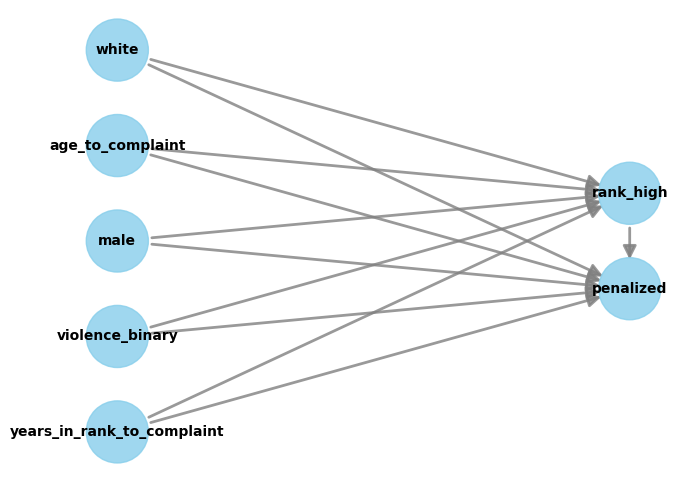

Identified Estimand: 
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(E[penalized|years_in_rank_to_complaint,violence_binary,male,age_t
d[rank_high]                                                                  

                   
o_complaint,white])
                   
Estimand assumption 1, Unconfoundedness: If U→{rank_high} and U→penalized then P(penalized|rank_high,years_in_rank_to_complaint,violence_binary,male,age_to_complaint,white,U) = P(penalized|rank_high,years_in_rank_to_complaint,violence_binary,male,age_to_complaint,white)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [153]:
model = CausalModel(
    data=model_df,
    treatment='rank_high',
    outcome='penalized',
    common_causes=confounders.columns.tolist()
)

# visualized model
model.view_model()

# figure out which variables should be used
identified_estimand = model.identify_effect()
print("Identified Estimand: ")
print(identified_estimand)

In [154]:
# !! swap to randomforest
# dml = LinearDML(model_y=LassoCV(cv=2, n_alphas=1, verbose=0, n_jobs=-1),
#                 model_t=LassoCV(cv=2, n_alphas=1, verbose=0, n_jobs=-1),
#                 linear_first_stages=True, cv=2)

# !! try out one hot encoding for allegation category

# split data
X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(X, T, Y, test_size=0.2, random_state=42)

# fitting the random forests on the training data for the outcome and treatment models
dml = LinearDML(model_y=RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42),
                model_t=RandomForestClassifier(n_estimators=10, random_state=42),
                discrete_treatment=True,
                linear_first_stages=False, cv=2)

dml.fit(Y=Y_train, T=T_train, X=X_train, inference="statsmodels")

treatment_effects = dml.effect(X_test) # individual treatment effects for each x?
ate = treatment_effects.mean()
ci = dml.effect_interval(X)

In [155]:
# rerun with random forest treatment effect
print(f"Average Treatment Effect (ATE): {ate}")
print(f"95% Confidence Interval: {ci}")

Average Treatment Effect (ATE): -0.09592529889184843
95% Confidence Interval: (array([-0.15101844, -0.15101844, -0.15101844, ..., -0.08088059,
       -0.08088059, -0.08088059]), array([-0.11841473, -0.11841473, -0.11841473, ..., -0.00772541,
       -0.00772541, -0.00772541]))


### Predicting Final Finding Outcome for White vs. Non-white Officers

Using doWhy to estimate the final finding for white vs non-white officers, using high/low rank as treatment.

** this section is unfinished, testing only and isn't included in detail in the final report


In [156]:
both_rows = selected_columns[selected_columns['final_finding'].isin(['SUSTAINED', 'NOT SUSTAINED'])]
ff_model_df = both_rows[['final_finding','penalty_code','gender','race','allegation_category', 'cleaned_rank_x', 'violence_classification','age_to_complaint','years_in_rank_to_complaint']]
ff_model_df['finding'] = ff_model_df['final_finding'].apply(lambda x: 1 if x == 'SUSTAINED' else 0)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [157]:
# convert white, male, and allegation category to binary
ff_model_df['white'] = ff_model_df['race'].apply(lambda x: 1 if x == 'WHITE' else 0)
ff_model_df['male'] = ff_model_df['gender'].apply(lambda x: 1 if x == 'MALE' else 0)
ff_model_df['violence_binary'] = np.where(ff_model_df['violence_classification'] == 'Violent', 1, 0)

# rank processing
ff_model_df['rank'] = ff_model_df['cleaned_rank_x'].map(rank_order)
ff_model_df['rank_high'] = np.where(ff_model_df['rank'] >= 6, 1, 0)


ff_model_df.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,final_finding,penalty_code,gender,race,allegation_category,cleaned_rank_x,violence_classification,age_to_complaint,years_in_rank_to_complaint,finding,white,male,violence_binary,rank,rank_high
1,NOT SUSTAINED,NaN,MALE,HISPANIC,USE OF PROFANITY,SERGEANT,Non-Violent,41.0,7.0,0,0,1,0,6.0,1
2,NOT SUSTAINED,NaN,MALE,HISPANIC,UNNECESSARY DISPLAY OF WEAPON / ON DUTY,SERGEANT,Non-Violent,41.0,7.0,0,0,1,0,6.0,1
3,NOT SUSTAINED,NaN,MALE,HISPANIC,TAKE DOWN (THROWN TO GROUND),SERGEANT,Non-Violent,41.0,7.0,0,0,1,0,6.0,1
4,NOT SUSTAINED,NaN,MALE,HISPANIC,SEARCH OF PREMISE - PROPERTY / USC TAKEN,SERGEANT,Non-Violent,41.0,7.0,0,0,1,0,6.0,1
5,NOT SUSTAINED,NaN,MALE,HISPANIC,HANDCUFF TOO TIGHT,SERGEANT,Non-Violent,37.0,3.0,0,0,1,0,6.0,1


In [158]:
ff_model_df[ff_model_df['finding']==0]['rank'].isna().sum()

35

In [159]:
ff_model_df = ff_model_df.dropna(subset=['rank'])

In [160]:
races = ff_model_df['white'].unique()
results = {}

for race in range(0, 2):
    # Subset data for the current race
    race_data = ff_model_df[ff_model_df['white'] == race]

    # Define the causal model
    model = CausalModel(
        data=race_data,
        treatment='rank',
        outcome='finding',
        common_causes=['gender', 'violence_binary']
    )

    # Identify the causal effect
    identified_estimand = model.identify_effect()
    print(f"Identified estimand for {race}: {identified_estimand}")

    # Estimate the causal effect using backdoor adjustment
    estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
    print(f"Causal effect estimate for {race}: {estimate.value}")

    # Store the results
    results[race] = estimate.value

# Print and compare the results
print("Causal Effect Estimates by Race:")
for race, estimate in results.items():
    print(f"Race: {race}, Causal Estimate: {estimate}")


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Identified estimand for 0: Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                      
───────(E[finding|gender,violence_binary])
d[rank]                                   
Estimand assumption 1, Unconfoundedness: If U→{rank} and U→finding then P(finding|rank,gender,violence_binary,U) = P(finding|rank,gender,violence_binary)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



Causal effect estimate for 0: 0.014242390144688477
Identified estimand for 1: Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                      
───────(E[finding|gender,violence_binary])
d[rank]                                   
Estimand assumption 1, Unconfoundedness: If U→{rank} and U→finding then P(finding|rank,gender,violence_binary,U) = P(finding|rank,gender,violence_binary)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Causal effect estimate for 1: 0.008690260218541856
Causal Effect Estimates by Race:
Race: 0, Causal Estimate: 0.014242390144688477
Race: 1, Causal Estimate: 0.008690260218541856


In [161]:
# trying again for four point value estimates
# Define unique values for race and rank
races = ff_model_df['white'].unique()  # Assuming 'white' is a binary indicator for race
ranks = ff_model_df['rank_high'].unique()   # Assuming 'rank' is already defined as high and low

results = {}

for race in races:
    for rank in ranks:
        # Subset data for the current race and rank
        subset_data = ff_model_df[(ff_model_df['white'] == race) & (ff_model_df['rank_high'] == rank)]

        # Check if the subset data is not empty
        if subset_data.shape[0] == 0:
            print(f"No data available for race: {race}, rank: {rank}")
            continue

        # Define the causal model
        model = CausalModel(
            data=subset_data,
            treatment='rank_high',
            outcome='finding',
            common_causes=['gender', 'violence_binary']
        )

        # Identify the causal effect
        identified_estimand = model.identify_effect()
        print(f"Identified estimand for race {race}, rank {rank}: {identified_estimand}")

        # Estimate the causal effect using backdoor adjustment
        try:
            estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
            print(f"Causal effect estimate for race {race}, rank {rank}: {estimate.value}")

            # Store the results
            results[(race, rank)] = estimate.value
        except ValueError as e:
            print(f"Error estimating causal effect for race {race}, rank {rank}: {e}")

# Print and compare the results
print("Causal Effect Estimates by Race and Rank:")
for (race, rank), estimate in results.items():
    race_label = 'white' if race == 1 else 'non-white'
    rank_label = 'high' if rank == 1 else 'low'
    print(f"Race: {race_label}, Rank: {rank_label}, Causal Estimate: {estimate}")


Identified estimand for race 0, rank 1: Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                         
────────────(E[finding|gender,violence_binary])
d[rank_high]                                   
Estimand assumption 1, Unconfoundedness: If U→{rank_high} and U→finding then P(finding|rank_high,gender,violence_binary,U) = P(finding|rank_high,gender,violence_binary)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Causal effect estimate for race 0, rank 1: -149313365899.59384


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Identified estimand for race 0, rank 0: Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                         
────────────(E[finding|gender,violence_binary])
d[rank_high]                                   
Estimand assumption 1, Unconfoundedness: If U→{rank_high} and U→finding then P(finding|rank_high,gender,violence_binary,U) = P(finding|rank_high,gender,violence_binary)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Causal effect estimate for race 0, rank 0: -5.551115123125783e-17
Identified estimand for race 1, rank 1: Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                         
────────────(E[finding|gender,violence_binary])
d[rank_high]                                   
Estimand assumption 1, Unconfoundedness: If U→{rank_high} and U→finding then P(finding|rank_high,gender,violence_binary,U) = P(finding|rank_high,gender,violence_binary)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Causal effect estimate for race 1, rank 1: -611043265983.8927
Identified estimand for race 1, rank 0: Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                         
────────────(E[finding|gender,violence_binary])
d[rank_high]                                   
Estimand assumption 1, Unconfoundedness: If U→{rank_high} and U→finding then P(finding|rank_high,gender,violence_binary,U) = P(finding|rank_high,gender,violence_binary)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Causal effect estimate for race 1, rank 0: 0.0
Causal Effect Estimates by Race and Rank:
Race: non-white, Rank: high, Causal Estimate: -149313365899.59384
Race: non-white, Rank: low, Causal Estimate: -5.551115123125783e-17
Race: white, Rank: high, Causal Estimate: -611043265983.8927
Race: white, Rank: low, Causal Estimate: 0.0
